## Import libraries

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

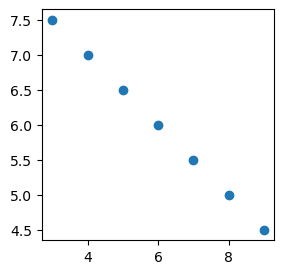

In [2]:
plt.figure(figsize = (3, 3))
plt.scatter([3, 4, 5, 6, 7, 8, 9], 
            [7.5, 7.0, 6.5, 6.0, 5.5, 5.0, 4.5]);

In [3]:
# !pip install torch
import torch      
# from torch.autograd import Variable # automatic differentiation    
import torch.nn as nn # module provides various classes and functions for building and training neural networks
torch.set_num_threads(1)

print("PyTorch version:", torch.__version__)

PyTorch version: 2.4.1+cpu


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Variable is Deprecated
x = torch.tensor([1.0, 2.0, 3.0], requires_grad = True)  # Directly use tensors with autograd enabled
print(x)

y = x ** 2  # Some operation
print(y)

y.sum().backward()  # Perform backpropagation to compute gradients
print(x.grad)  # Gradients are stored in x.grad

tensor([1., 2., 3.], requires_grad=True)
tensor([1., 4., 9.], grad_fn=<PowBackward0>)
tensor([2., 4., 6.])


## Create linear regression class

In [6]:
nn.Module

torch.nn.modules.module.Module

In [5]:
class LinearRegression(nn.Module):

    def __init__(self, input_size, output_size):

        # super function. It inherits from nn.Module and we can access everything in nn.Module
        super(LinearRegression, self).__init__()

        # Linear function.
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

## Define model

In [6]:
# define model
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim, output_dim) # input and output size are 1
print(model)

# MSE
mse = nn.MSELoss()
print(mse)

# Optimization (find parameters that minimize error)
learning_rate = 0.02   # how fast we reach best parameters
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
print(optimizer)

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
MSELoss()
SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.02
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


## Create data

In [7]:
car_prices_array = [num for num in range(3, 10)]
car_price_np = np.array(car_prices_array, dtype = np.float32)
car_price_np = car_price_np.reshape(-1, 1)
# car_price_tensor = Variable(torch.from_numpy(car_price_np))
car_price_tensor = torch.from_numpy(car_price_np).float()  # Ensure it's of type float (necessary for autograd)
car_price_tensor.requires_grad = True
print(car_price_tensor)

tensor([[3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]], requires_grad=True)


In [8]:
# Define number of car sell
number_of_car_sell_array = [7.5, 7.0, 6.5, 6.0, 5.5, 5.0, 4.5] # [num*0.1 for num in range(75, 40, -5)]
number_of_car_sell_np = np.array(number_of_car_sell_array, dtype = np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1, 1)
# number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))
number_of_car_sell_tensor = torch.from_numpy(number_of_car_sell_np).float()
number_of_car_sell_tensor.requires_grad = True
print(number_of_car_sell_tensor)

tensor([[7.5000],
        [7.0000],
        [6.5000],
        [6.0000],
        [5.5000],
        [5.0000],
        [4.5000]], requires_grad=True)


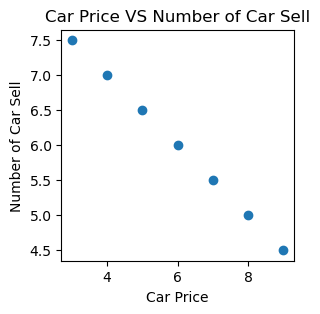

In [10]:
# visualize our data
plt.figure(figsize = (3, 3))
plt.scatter(car_prices_array, number_of_car_sell_array)
plt.xlabel("Car Price")
plt.ylabel("Number of Car Sell")
plt.title("Car Price VS Number of Car Sell")
plt.show()

## Train model

In [11]:
# train model
loss_list = []
iteration_number = 1001

for iteration in range(iteration_number):
        
    # optimization
    optimizer.zero_grad() 
    
    # Forward to get output
    results = model(car_price_tensor)
    
    # Calculate Loss
    loss = mse(results, number_of_car_sell_tensor)
    
    # backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    
    # print loss
    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))

epoch 0, loss 104.13494873046875
epoch 50, loss 6.395205974578857
epoch 100, loss 4.32150936126709
epoch 150, loss 2.920225143432617
epoch 200, loss 1.973318099975586
epoch 250, loss 1.3334543704986572
epoch 300, loss 0.9010709524154663
epoch 350, loss 0.6088917851448059
epoch 400, loss 0.41145405173301697
epoch 450, loss 0.2780376076698303
epoch 500, loss 0.1878816932439804
epoch 550, loss 0.1269596517086029
epoch 600, loss 0.08579213917255402
epoch 650, loss 0.05797366052865982
epoch 700, loss 0.03917519003152847
epoch 750, loss 0.02647232636809349
epoch 800, loss 0.01788875088095665
epoch 850, loss 0.012088225223124027
epoch 900, loss 0.008168483152985573
epoch 950, loss 0.0055198692716658115
epoch 1000, loss 0.0037299487739801407


## Plot graph

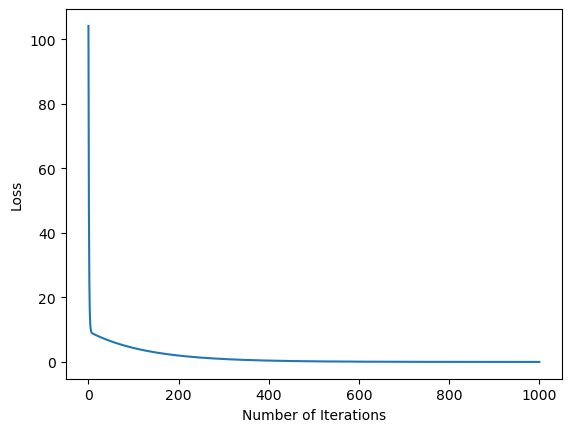

In [12]:
plt.plot(range(iteration_number), loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

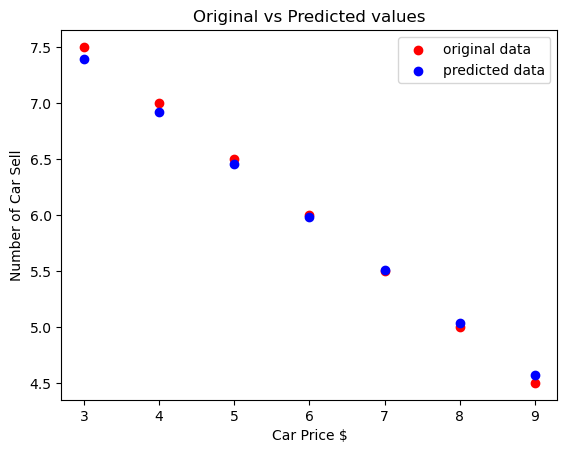

In [13]:
# predict our car price 
predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array,number_of_car_sell_array,label = "original data",color ="red")
plt.scatter(car_prices_array,predicted,label = "predicted data",color ="blue")

# predict if car price is 10$, what will be the number of car sell
#predicted_10 = model(torch.from_numpy(np.array([10]))).data.numpy()
#plt.scatter(10,predicted_10.data,label = "car price 10$",color ="green")
plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")
plt.show()